<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/team1/lec4_feature_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###github cmd-tested

In [45]:
!git config --global user.name "MohmedAAK"  
!git config --global user.email "nart465@gmail.com"  

In [50]:
!git remote add origin https://[access-token]@github.com/[MohmedAAK(my username)]/-Advanced-computer-vision-v1.git

In [51]:
!git fetch origin

remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 297 (delta 132), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (297/297), 8.21 MiB | 11.01 MiB/s, done.
Resolving deltas: 100% (132/132), done.
From https://github.com/MohmedAAK/-Advanced-computer-vision-v1
 * [new branch]      Ahmed-Ramadan -> origin/Ahmed-Ramadan
 * [new branch]      main          -> origin/main


In [52]:
!git checkout -b Ahmed-Ramadan origin/Ahmed-Ramadan

Branch 'Ahmed-Ramadan' set up to track remote branch 'Ahmed-Ramadan' from 'origin'.
Switched to a new branch 'Ahmed-Ramadan'


In [53]:
!git checkout -b Ahmed-Ramadan origin/Ahmed-Ramadan
!git merge main

fatal: A branch named 'Ahmed-Ramadan' already exists.
merge: main - not something we can merge

Did you mean this?
	origin/main


In [58]:
!git checkout main
!git merge --no-ff Ahmed-Ramadan
!git push origin main
!git commit -m "merge"
#lec4-feature detection

Already on 'main'
Your branch is ahead of 'origin/main' by 4 commits.
  (use "git push" to publish your local commits)
Already up to date.
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 2.05 KiB | 420.00 KiB/s, done.
Total 6 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/MohmedAAK/-Advanced-computer-vision-v1.git
   e2be048..a4dbe50  main -> main
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
	-Advanced-computer-vision-v1/
	.config/
	box.jpg
	eq1.png
	eq2.png
	eq3.png
	eq4.png
	eq5.png
	eq6.png
	google.png
	sample_data/

nothing added to commit but untracked files present


#Harris Corner Detection build in

##fetch data

In [ ]:
#download data
import os
import urllib.request
def download(path,name):
  urllib.request.urlretrieve(path,name)
urllib.request.urlretrieve('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPsAAAD5CAYAAADhukOtAAAVkElEQVR4nO3da1DUBdvH8T3inlxad1fRRcVcxCSNLMesPEU4lhiyeRo2DzMqaFCZZjPVG3U8pCZaFsvUWOJiUShk41BEWlmagpqKaE65TLoNjbjEEsthkP09bx67iZvu+36eqWu97XfNXO98wdeLj7L/Gf0r7rvvPnC53Ft/FQMGDMCAAQNgs9lgtVq5XO4ttna7HXfeeScUTqcTTqcTOp0Ow4YNQ2pqKjIyMkQ3PT0dMTExUKvVUCgUYqtUKuF0OpGWlibePHv27Ig0q9VqxMXFYebMmRG5c2xsLFQqlWizVqvFwIEDMXfuXPHmadOmIS4uDkqlUrS560ZFRSEhIQGKG3/F9+7dG7Nnz8YHH3yAEydOiG1VVRXKysowduxYREVFiX/ju1wu7N+/X7z58OHDGDNmDHQ6nWhzr169MHXqVBw8eFC0+cSJEygrK8PEiROh1WpFm41GIyZPnoyjR4+iqqpKtPn999/HI488ElHser0ew4cP/z32nJwc1NTUQHLC4TD8fj9SUlLQq1cv0d8EjUaDzMxM+Hw+8eampiYkJyfDYDCIHz4jIwOBQEC0GQD8fj/S0tLE/1A3m81IT09Ha2srwuGwaHN1dTXcbrf4TzPETuzETuzELt1M7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MQuOsRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7KLNxN5liJ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YxZuJndiJndiJndiJndiJndiJndiJndiJndiJndiJndhFh9iJndiJndiJndiJndiJndiJndj//9izs7NRU1ODcDgsuleuXEFKSgp0Oh2USqXYajQaZGVl4dKlS6K9nZ2dv8Mu2XwD+7Vr1yJy57S0NPTq1Uu02Ww2w+Vy/YZdcrtil2zu+m65HrEvXrwY33zzDRoaGsQ2EAjg/PnzmD59Ovr16weLxSK2NpsNTz75JM6cOSPefOXKFUybNg39+/cXbe7fvz8WLFgAn88n2tzQ0IDz589j1qxZ6Nu3r2jzjTe41tXVIRAIiDYfO3YMCxcuhNVqFW2+7bbbfvuLpEfscXFxmDRpElJTU8V2+vTpmDt3LvLy8lBaWoqPPvpIbD/88ENs2rQJGRkZ4s0ulwsejwclJSWizSUlJcjNzcXjjz8u2pyamoo5c+bgtddeE7/z3r178eqrr2LGjBmYPn26aPO8efOwdetW7N+/X7S5uLgYq1atgtls7hm7RqOBXq+H0WgUXafTiQMHDqChoQHNzc1i29jYiDfeeAPDhw8X7TWZTLDb7SgrK0N9fb1o87Vr11BQUACHwyF+56FDh6K4uFj8znV1dXj//fdhsVjEm0ePHo1du3ahqalJtPnq1asoKCiAzWbrGXskHh4olUo4HA6Ul5ejra1N9OFJR0cH8vPzERcXJ95sMplQUVGBUCgk2tzS0oLCwkJYLBbxWzscDpSWlqK9vV20ORgMYt++feIPgBUKBRITE+H1etHZ2SnaHAqFUFRUBLvdTuwAsRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sf/lQ+zETuzE/vfCbrPZYLPZoNVqiZ3Yif1Wxj5ixAiMGDFC/F9fETuxSw2x88d4Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid20WZi7zbETuzETuzETuzETuzETuzETuzETuzETuzETuySQ+zdhtiJndiJndiJndiJndiJndiJndiJndiJndiJXXKIvdsQO7ETO7ETO7Hf2thVKhXUajU0Go3oDho0CB9//DGam5vR0dEhti0tLfB4PBg6dKhor1arRXR0NMrLyxEMBkWbm5qa4PV6YbfbI3LnkpIShEIh0eZAIIDi4mIYjUbx5pEjR2L37t1oa2sTbQ4Gg9izZ88fY09MTMSsWbOQmZkputnZ2diyZQs8Hg/y8/PF1uPxYN26dcjJyRFvXrp0KbZs2YK8vDzx5o0bN2LZsmURufOmTZvE75yXl4eXX34ZWVlZ4s1PP/00NmzYINqbn5+P1157DYsXL0bv3r17xj5//nyUl5fD5/OJ7aVLl1BZWYmZM2di2LBhiIuLE9uhQ4fiqaeewpEjR8Sbz507B5fLheHDh4s2JyQkYNGiRTh9+rRos8/nQ2VlJdxuN+Lj40WbExMTMX/+fHz33Xe4dOmSaPOhQ4ewePFi3H777aLNgwcPht1uh1qt7hl7Tk4OampqRD9bhMNh+P1+pKSkiH+m0mg0yMzMhM/nE29uampCcnKy+H/0qdfrkZGRgUAgINoMAH6/H2lpaYiKihJtNpvNSE9PR2trK8LhsGhzdXU13G43VCqV+POCrjcndmIXHWIndmIndmIndmIndmIndmIndmIndmIndmIndmIndtFmYu8yxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7s4s3ETuzETuzETuzETuzETuzETuzETuzETuzETuzETuyiQ+wRxp6UlISkpCQYjUZiF2wmdmIXx242m2E2m6FWq4ldsJnYiV0c+5gxYzBmzBiYTCZiF2wmdmIXx87P7MQuNcRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7KLNNy327OxsnDt3Dp2dnaJ7+fJlTJkyBXq9HiqVSmy1Wi2ysrJw6dIl0d7r168jGAwiOTkZRqNRtNlgMCAjIwP19fURuXNaWhp0Op1oc3R0NFwuF1paWsSbz549C7fbDbVaLdqsUqmgVCr/GPuSJUtw7Ngx/PLLL2Lb0NCACxcuIDU1FX379kV0dLTYWq1WLFu2DGfPnhVvvnLlCh599FHExMSINvfr1w/z589HbW2taPMvv/yCCxcuYObMmbDb7aLNsbGxmDNnDn7++Wc0NDSINh8/fhwLFiyAxWIRbY6OjobBYIBSqewZe0xMDJKSkjBu3DjRnTp1Kt555x18+eWXOHLkiNh+9dVX2Lp1K6ZNmybae//992PSpEnYtWsXvvjiC9HmL774Ajt27EBycnJE7vzmm2/i8OHDos2HDh1Cfn4+xo8fL96cnp6OHTt24OuvvxZtPnjwINauXQuLxdIzdrVajaioKOh0OtEdMmQIysrK0NjYiNbWVrH99ddfkZeXh2HDhon26vV6WK1WfPLJJ2hoaBBtbmhowO7duxETExORO+/duxfBYFC0+erVq/jggw9gNpvFm5OSklBQUIBQKCTaHAgE4PV6Ybfbe8YeiYcHSqUSDocD5eXlaGtrE3140tHRgfz8fMTFxYk3m0wmVFRUIBQKiTa3tLSgsLAQFotF/NYOhwOlpaVob28XbQ4Gg9i3b5/4A2CFQoHExER4vV50dnaKNodCIRQVFRH7jSF2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2YpccYu82xE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7skkPs3YbYiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiV1yiL3bEDuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxSw6xdxtiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3bJIfZuQ+zE/rfFrtVqodfrYTQaxdZkMsHpdOLAgQMIBAJobm4W28bGRrzxxhu44447xJv79u2LsrIy1NfXizbX19ejoKAADodDtNloNMLpdKK4uBgNDQ2izXV1dSgqKkKfPn3Em0ePHo1du3ahqalJtPnq1avYtWsXbDbbP7DHx8cjPj4eOp0Od911F5544gk8/fTTortixQps3LgR27Ztw/bt28V227ZtWLt2LVauXCnevHz5cmzcuBG5ubmizbm5uVi3bh2WL18ekTtv2LBB/M65ublYv349nnnmGfHm5557DuvWrRNv3rx5MxYsWACTyfQP7P3790f//v0RFRUV8fezS7+3O5LvZ/f7/X/L97PPmjVL/M4Oh+O397NLN9+072fPyclBTU2N6GeLcDgMv9+PlJQU8c9UGo0GmZmZ8Pl84s1NTU1ITk6GwWAQbdbr9cjIyEAgEBBtBgC/34+0tDRERUWJNpvNZqSnp6O1tRXhcFi0ubq6Gm63GyqVSvx5QdebEzuxiw6xEzuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxEzuxE7toM7F3GWIndmIndmIndmIndmIndmIndmIndmIndmIndmIndvFmYid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid20SF2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2YhdtJvYuQ+zETuzETuzETuzETuzETuzETuzETuz/Hnt2djaqq6vR2dkpttevX8fly5cxZcoU6PV6qFQqsY2KikJWVhZ++OEH8ebGxkY8/PDDMJlMos1GoxEZGRmor68Xbe7s7MTly5cxY8YM6HQ60ebbbrsNLpcLoVAI169fF20+e/Ys3G43NBqNaPON/UPs8+fPx6effora2lqx9fl8qKysxOOPP474+HgMHjxYbIcOHYqnnnoKR48eFW+uqamBy+VCQkKCaHNCQgIWLVqEM2fOiDbX1taisrISbrcbTqdTtHnEiBGYN28eLl68CJ/PJ9p86NAhLF68GEOGDBFtHjRoEOx2O9Rqdc/YbTYbhg8fjqSkJNGdNGkSvF4vKisrcerUKbGtqqpCbm4uUlJSRHvvvvtujB07Fnv27MGxY8dEm48fP468vDw88MAD4neePHky3n77bVRVVYk2HzlyBG+99RbGjBkj3jxt2jTk5eXh5MmTos1Hjx7Fpk2bYLFYesauUqmgVquh0WjEVqvVYtCgQfj444/R3NyMjo4OsW1tbYXH44HT6RRvjo6OxqeffopgMCja3NTUBK/XC7vdLtqs0WgwaNAglJSUIBQKiTYHAgEUFxfDaDSKN48aNQq7d+9Ge3u7aHMwGMSePXtgt9t7xh6JhwdKpRIOhwPl5eVoa2sTfXjS0dGB/Px8xMXFiTebTCZUVFQgFAqJNre0tKCwsBAWi0X81g6HA6WlpWhvbxdtDgaD2Ldvn/gDYIVCgcTERHi9XnR2doo2h0IhFBUVEfuNIXZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3Zilxxi7zbETuzETuzETuy3HvYBAwZgwIAB4v84gdiJXWqI/X+xO51OOJ1O6HQ6Yid2Yr+VsfPHeGIndmIndmIndmIndmIndmIndmIndmIndmIndpkh9m5D7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MRO7MQuOcTebYid2Imd2Imd2Imd2Imd2Imd2Imd2Imd2Imd2CWH2LsNsRM7sRM7sRP7rY3dYDDAZrMhJiZGdEeNGoWSkhL8+OOPqKurE1u/348dO3Zg9OjR4s1DhgzBhx9+iNraWtHm2tpa7Ny5E8OGDRNvHjlyJN59911cvnxZtPn7779HYWEhBg4cKN58//33Y+fOnfjpp59Em30+H/Lz82G1WnvGfs8992DJkiV44YUXRPfFF1/E2rVrsX79evFdvXo1Xnrppb9V85o1a/Diiy9GpHnNmjXivevWrcOaNWvEe1944QW89NJLEWlevXo15s6dC6PR2DP2ZcuW4fTp02hvbxfbtrY21NbWYurUqTCZTNBqtWKr1+uxdOlSXLx4Ubw5EAhgypQpiI6OFm02m81wu92oq6sTbW5vb0dtbS3S09NhNBpFm61WK2bOnIlgMIi2tjbR5tOnT2PevHnQ6XSizVqtFhqNBgqFomfsOTk5qKmpEf1sEQ6H4ff7kZKSIv6ZSqPRIDMzEz6fT7y5qakJycnJMBgMos16vR4ZGRkIBAKizQDg9/uRlpYm/j8Zm81mpKeno7W1FeFwWLS5uroabrcbKpVK/HlB15sTO7GLDrETO7ETO7ETO7ETO7ETO7ETO7ETO7ETO7ETO7ETu2gzsXcZYid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid28WZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3ZiJ3bRIXZiJ3ZiJ3ZiJ3ZiJ/Y/DbvVaoXVaoVGoyF2wWZiJ3Zx7ImJiUhMTITBYCB2wWZiJ3Zx7PwxntilhtiJndiJndiJndiJndiJndiJndiJndiJndiJ/Z+wZ2VlEbvQXLlyJWLYXS4XsXfF7nK54PV6cfjwYdE9cOAAFi5ciIkTJ+LBBx8U2wkTJmDFihXYv3+/ePNnn32GBQsWYPLkyaLNkydPRnZ2NsrLyyNy58zMTPE7JycnIysrC59//rl4c3FxMXJycjB+/HjR5nHjxiEhIeG3F5j+E3ar1Yr4+HiMHDlSdCdMmIDCwkKcPHkSZ86cEdtTp05h27ZteOihh8Sb7733Xrz77ruoqqoSba6qqoLH48F9990XkTu//fbb4nc+duwYdu7cidGjR4s3P/LII/B4PDh9+rRo8/Hjx7F582ZYLJaesSsUCiiVStFVqVSIjY3FJ598gpaWFoTDYbFtb2+Hx+PBkCFDxJt79+6NiooKNDc3izY3NzejsLAQffr0Eb91bGwsSktLf/txWmobGxuxd+9e6HQ6qFQq0eY777wTXq8XHR0d4nd+7733YLfb/xi79CqVSjgcDpSXl6OtrU3081RHRwfy8/MRFxcn3mwymVBRUYFQKCTa3NLSgsLCQlgsFvFbOxwOlJaWor29XbQ5GAxi37594s+EFAoFEhMT4fV60dnZKdocCoVQVFRE7DeG2Imd2Imd2Imd2Imd2Imd2Imd2Imd2Imd2Ildcoi92xA7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sRM7sUsOsXcbYid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2Yid2ySH2bkPsxE7sxE7sxE7sxE7sxE7sxE7sxE7sxE7sxC45xN5tiJ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YiZ3YJYfYuw2xEzuxC3/j9+vXD++88w5qamrw/fffi+2FCxewdu1axMbGijcbDAYUFBSgurpatLm6uhpbt25FdHS0+K379esHj8eD8+fPizZ/++23eP3118VfFa1QKBAfH49XXnkFFy9eFG0+e/Ystm/fjj59+tw82BUKBUwmE2bNmoUVK1bg+eefF9vnnnsOU6ZMicg3vlarxZw5c/Dss8+KNj/77LNITU2FTqeLyJ3T09OxcuVK0eZnnnkGM2bMgFqtFm+22WxITU3FqlWrxO/82GOPQa/X94xdpVJFdNVq9b/d//TX/af7V3TceFPrn9H7V+z/5WuMxI273uVmv/Wf3f1X9Op0ut9jj46OhsFggNlsvqlXp9PBZDJF/Ov4o+3duzd69eoV8a/jX63JZIJer4/41/Gv1mg0/ld8PxoMhpv+6zQYDEhISMD/AISD1xm5PZTtAAAAAElFTkSuQmCC', 'google.png')

('google.png', <email.message.Message at 0x7f462ef2e5d0>)

Capture_1.PNG

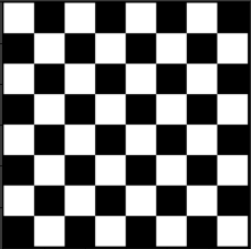

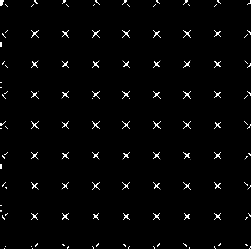

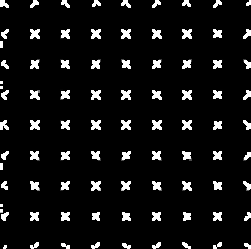

50481756.160000004


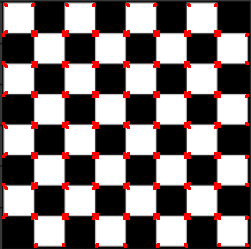

In [ ]:
# corner detection with
# Harris Corner Detection Method
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = cv2.imread('google.png')
cv2_imshow( image)
# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method

#blocksize :It is the size of neighbourhood considered for corner detection
#ksize :Aperture parameter for the Sobel operator.
#k :Harris detector free parameter in the equation.

#                            image    blocksize    ksize       k
dest = cv2.cornerHarris(operatedImage,    2    ,     5     ,  0.07)
cv2_imshow( dest)
# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)
cv2_imshow( dest)
print(0.01 * dest.max())
# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

# the window showing output image with corners
cv2_imshow( image)



refrences

http://www.opencv.jp/opencv-2.2_org/py/imgproc_feature_detection.html#:~:text=aperture_size%28int%29%20%E2%80%93%20Aperture%20parameter%20for%20the%20Sobel%20operator,pixel%2C%20i.e.%20in%20terms%20of%20the%20previous%20function.

https://cppsecrets.com/users/38349798104105103117112116975748565564103109971051084699111109/Harris-Corner-cv2cornerHarris.php

https://www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/

https://docs.opencv.org/4.x/db/df6/tutorial_erosion_dilatation.html

https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345

https://muthu.co/harris-corner-detector-implementation-in-python/

#Harris Corner Detection from scratch

## fetch data

In [ ]:
import urllib.request
from IPython.display import Image, display
def download(path,name):
  urllib.request.urlretrieve(path,name)
def show(path):
  display(Image(path))  
download("https://muthu.co/wp-content/uploads/2018/09/Snip20180930_25.png","eq1.png")
download("https://muthu.co/wp-content/uploads/2018/09/Snip20180930_26.png","eq2.png")
download("https://muthu.co/wp-content/uploads/2018/09/Snip20180930_27.png","eq3.png")
download("https://muthu.co/wp-content/uploads/2018/09/Snip20180930_28.png","eq4.png")
download("https://muthu.co/wp-content/uploads/2018/09/Snip20180930_29.png","eq5.png")
download("https://muthu.co/wp-content/uploads/2018/09/Snip20180930_32.png","eq6.png")
download("https://muthu.co/wp-content/uploads/2018/09/box.jpg","box.jpg")


## infos

The Harris corner detection algorithm also called the Harris & Stephens corner detector is one of the simplest corner detectors available. The idea is to locate interest points where the surrounding neighbourhood shows edges in more than one direction. The basic idea of algorithm is to find the difference in intensity for a displacement of (u,v) in all directions which is expressed as below:

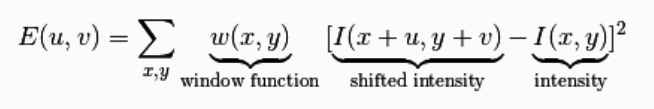

In [ ]:
show("eq1.png")

Window function is either a rectangular window or a gaussian window which gives weights to pixels at (x,y). The above equation can be further approximated using Tayler expansion which gives us the final formula as:

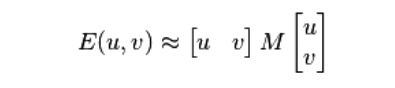

In [ ]:
show("eq2.png")

where

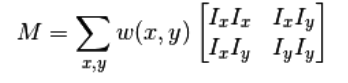

In [ ]:
show("eq3.png")

Ix and Iy are image derivatives in x and y directions respectively. One can compute the derivative using the sobel kernel.

Then we finally find the Harris response R given by:

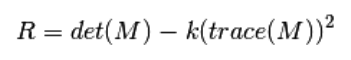

In [ ]:
show("eq4.png")

where A, B and C are shifts of window defined by w. The lambdas are the Eigen values of M.

We find the corners using the value of R.

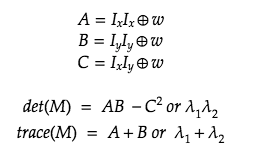

In [ ]:
show("eq5.png")

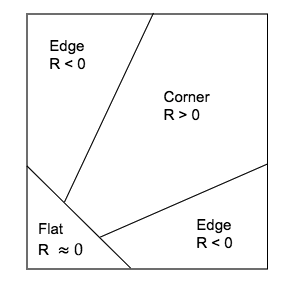

In [ ]:
show("eq6.png")

## algorithm

### Process of Harris Corner Detection Algorithm
1. Color to grayscale
2. Spatial derivative calculation
3. Structure tensor setup
4. Harris response calculation
5. Non-maximum suppression

#### Step 1 : Color to grayscale

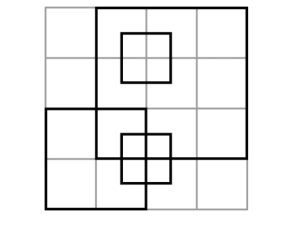

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.feature import corner_harris, corner_peaks

img = imread('box.jpg')
imggray = rgb2gray(img)

plt.imshow(imggray, cmap="gray")
plt.axis("off")
plt.show()

#### Step 2 : Spatial derivative calculation

In [ ]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

#### Step 3 : Structure tensor setup

In [ ]:
Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

#### Step 4: Harris response calculation

In [ ]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

# height, width = imggray.shape
# harris_response = []
# window_size = 6
# offset = int(window_size/2)
# for y in range(offset, height-offset):
#     for x in range(offset, width-offset):
#         Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
#         Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
#         Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
#         #Find determinant and trace, use to get corner response
#         det = (Sxx * Syy) - (Sxy**2)
#         trace = Sxx + Syy
#         r = det - k*(trace**2)
        
#         harris_response.append(r)

#### Step 5: Non-maximum suppression
1. Edge : r < 0
2. Corner : r > 0
3. Flat: r = 0

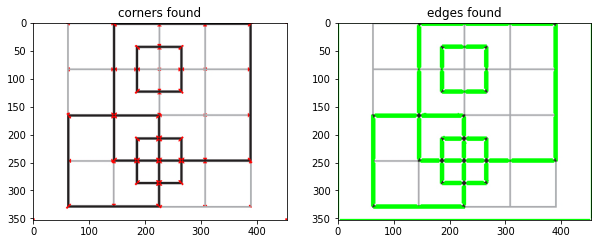

In [ ]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0.1:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < -0.1:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].set_title("corners found")
ax[0].imshow(img_copy_for_corners)
ax[1].set_title("edges found")
ax[1].imshow(img_copy_for_edges)
plt.show()

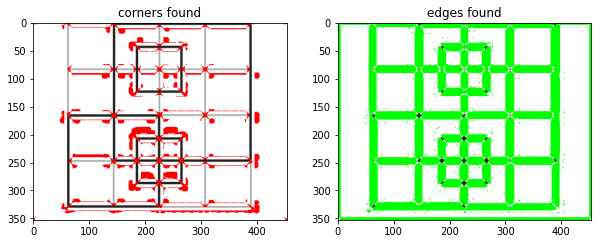

In [ ]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].set_title("corners found")
ax[0].imshow(img_copy_for_corners)
ax[1].set_title("edges found")
ax[1].imshow(img_copy_for_edges)
plt.show()

### Grouping the corners into one point
You can see there are multiple corners points found in the image, we need to find the local maxima of the corner points. there is a method in skimage which does a neat job in finding the peaks 

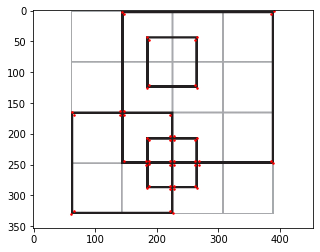

In [ ]:
corners = corner_peaks(harris_response,threshold_rel=0.1)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)

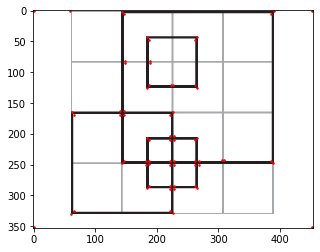

In [ ]:
#Harris corner detection using skimage library
from skimage.feature import corner_harris, corner_peaks
img = imread('box.jpg')
imggray = rgb2gray(img)  
skimage_harris_response= corner_harris(imggray)      
coords = corner_peaks(skimage_harris_response, threshold_rel=0.1)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)